# Evaluation

## Load

In [245]:
import torch
from sklearn.metrics import top_k_accuracy_score

from kddirkit.metrics import metric

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import os
import sys
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from ast import literal_eval
from joblib import dump, load

""
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

import platform
if 'Windows' in platform.platform():
    ROOT_PATH = "D:/PycharmProjects/HMAN"
else:
    ROOT_PATH = "/home/xkliu/PycharmProjects/HMAN"
RAW_DATA_PATH = ROOT_PATH  + "/raw_data"
DATA_PATH = ROOT_PATH + "/data"
os.chdir(ROOT_PATH)
sys.path.append("./")
MODEL_SAVE_PATH = ROOT_PATH + "/outputs/ckpt/best_results"
PLOT_DATA_PATH = ROOT_PATH + "/outputs/plot"
from kddirkit.utils import utils


In [179]:
import logging
import torch.nn as nn
import numpy as np

from kddirkit.networks.encoders import SentenceEncoder
from kddirkit.networks.models import BaselineModel
from kddirkit.config import *
# from kddirkit.dataloaders import LoadNYT, LoadHierData
from kddirkit.frameworks import Trainer
from kddirkit.losses.FocalLoss import FocalLoss

project_name = 'HMAN'

logger = logging.getLogger(project_name)

In [180]:
track_dtype = {'track_id': int, 'album_id': int, 'album_type': str, 'artist_id': int, 'set_split': str,
               'set_subset': str, 'track_genre_top': str, 'track_genres': str, 'track_genres_all': str,
               'track_title': str}
genres_converters = {'track_genres': literal_eval, 'track_genres_all': literal_eval}
medium_data = pd.read_csv(RAW_DATA_PATH + '/medium_data.csv', converters=genres_converters)

In [181]:
medium_data_train = pd.read_csv(RAW_DATA_PATH + '/medium_data_train.csv', converters=genres_converters)
medium_data_test = pd.read_csv(RAW_DATA_PATH + '/medium_data_test.csv', converters=genres_converters)
medium_data_val = pd.read_csv(RAW_DATA_PATH + '/medium_data_val.csv', converters=genres_converters)

In [182]:
medium_instance_triple = np.load(DATA_PATH + '/' + 'medium_instance_triple.npy')
medium_instance_scope = np.load(DATA_PATH + '/' + 'medium_instance_scope.npy')
medium_label = np.load(DATA_PATH + '/' + 'medium_label.npy')

In [183]:
medium_train_instance_triple = np.load(DATA_PATH + '/' + 'medium_train_instance_triple.npy')
medium_train_instance_scope = np.load(DATA_PATH + '/' + 'medium_train_instance_scope.npy')
medium_train_label = np.load(DATA_PATH + '/' + 'medium_train_label.npy')

In [184]:
medium_val_instance_triple = np.load(DATA_PATH + '/' + 'medium_val_instance_triple.npy')
medium_val_instance_scope = np.load(DATA_PATH + '/' + 'medium_val_instance_scope.npy')
medium_val_label = np.load(DATA_PATH + '/' + 'medium_val_label.npy')

In [185]:
medium_test_entity_pair = np.load(DATA_PATH + '/' + 'medium_test_entity_pair.npy')
medium_test_entity_scope = np.load(DATA_PATH + '/' + 'medium_test_entity_scope.npy')
medium_test_label = np.load(DATA_PATH + '/' + 'medium_test_label.npy')

In [186]:
medium_label_transform = np.load(DATA_PATH + '/' + 'medium_label_transform.npy')
medium_train_label_transform = np.load(DATA_PATH + '/' + 'medium_train_label_transform.npy')
medium_val_label_transform = np.load(DATA_PATH + '/' + 'medium_val_label_transform.npy')
medium_test_label_transform = np.load(DATA_PATH + '/' + 'medium_test_label_transform.npy')
medium_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_label_bottom_transform.npy')
medium_train_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_train_label_bottom_transform.npy')
medium_val_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_val_label_bottom_transform.npy')
medium_test_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_test_label_bottom_transform.npy')

In [187]:
col_name = ['track_id', 'album_id', 'album_type', 'artist_id', 'set_split', 'set_subset', 'track_genres_top', 'track_genre', 'track_genres_all']
medium_data_train_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_train_sort.txt', sep ='-----',  skiprows =1, names  = col_name)
medium_data_val_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_VAL_sort.txt', sep = '-----',  skiprows =1, names  = col_name)
medium_data_test_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_test_sort.txt', sep = '-----', skiprows =1, names  = col_name)

C:\Users\Johan\AppData\Local\Temp\ipykernel_29488\691608824.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  medium_data_train_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_train_sort.txt', sep ='-----',  skiprows =1, names  = col_name)
C:\Users\Johan\AppData\Local\Temp\ipykernel_29488\691608824.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  medium_data_val_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_VAL_sort.txt', sep = '-----',  skiprows =1, names  = col_name)
C:\Users\Johan\AppData\Local\Temp\ipykernel_29488\691608824.py:4: ParserWarning: Falling back to the 'python' engine 

In [188]:
medium_data_train_sort

,track_id,album_id,album_type,artist_id,set_split,set_subset,track_genres_top,track_genre,track_genres_all
0,2,1,Album,1,training,small,Hip-Hop,[21],[21]
1,5,1,Album,1,training,small,Hip-Hop,[21],[21]
2,3,1,Album,1,training,medium,Hip-Hop,[21],[21]
3,134,1,Album,1,training,medium,Hip-Hop,[21],[21]
4,10666,1,Album,1,training,medium,Hip-Hop,[21],[21]
...,...,...,...,...,...,...,...,...,...
19917,155297,22935,Album,24354,training,medium,Instrumental,"[18, 107, 1235]","[107, 18, 1235]"
19918,155298,22936,Album,22050,training,medium,Folk,"[17, 103]","[17, 103]"
19919,155306,22936,Album,22050,training,medium,Folk,"[17, 103]","[17, 103]"
19920,155307,22937,Live Performance,7820,training,medium,Experimental,[1],"[1, 38]"


In [189]:
# Load metadata and features.
tracks = utils.load(RAW_DATA_PATH + '/fma_metadata/tracks.csv')
genres = utils.load(RAW_DATA_PATH + '/fma_metadata/genres.csv')
features = utils.load(RAW_DATA_PATH + '/fma_metadata/features.csv')
echonest = utils.load(RAW_DATA_PATH + '/fma_metadata/echonest.csv')

In [190]:
medium_data_train_sort.track_id

0             2
1             5
2             3
3           134
4         10666
          ...  
19917    155297
19918    155298
19919    155306
19920    155307
19921    155314
Name: track_id, Length: 19922, dtype: int64

In [191]:
small = tracks['set', 'subset'] <= 'medium'

train = tracks['set', 'split'] == 'training'
small = tracks['set', 'subset'] <= 'medium'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

chroma_cens_feature = features.loc[medium_data_train_sort.track_id, 'chroma_cens']
chroma_cqt_feature = features.loc[medium_data_train_sort.track_id, 'chroma_cens']
chroma_stft_feature = features.loc[medium_data_train_sort.track_id, 'chroma_cens']
chroma_feature = pd.concat([chroma_cens_feature, chroma_cqt_feature, chroma_stft_feature], axis = 1)
tonnetz_feature = features.loc[medium_data_train_sort.track_id, 'tonnetz']
mfcc_feature = features.loc[medium_data_train_sort.track_id, 'mfcc']
centroid_feature = features.loc[medium_data_train_sort.track_id, 'spectral_centroid']
bandwidth_feature = features.loc[medium_data_train_sort.track_id, 'spectral_bandwidth']
contrast_feature = features.loc[medium_data_train_sort.track_id, 'spectral_contrast']
rolloff_feature = features.loc[medium_data_train_sort.track_id, 'spectral_rolloff']
rmse_feature = features.loc[medium_data_train_sort.track_id, 'rmse']
zcr_feature = features.loc[medium_data_train_sort.track_id, 'zcr']
X_train = np.array(pd.concat([chroma_feature, tonnetz_feature, mfcc_feature, centroid_feature, bandwidth_feature, contrast_feature, rolloff_feature, rmse_feature, zcr_feature], axis = 1))

chroma_cens_feature = features.loc[medium_data_test_sort.track_id, 'chroma_cens']
chroma_cqt_feature = features.loc[medium_data_test_sort.track_id, 'chroma_cens']
chroma_stft_feature = features.loc[medium_data_test_sort.track_id, 'chroma_cens']
chroma_feature = pd.concat([chroma_cens_feature, chroma_cqt_feature, chroma_stft_feature], axis = 1)
tonnetz_feature = features.loc[medium_data_test_sort.track_id, 'tonnetz']
mfcc_feature = features.loc[medium_data_test_sort.track_id, 'mfcc']
centroid_feature = features.loc[medium_data_test_sort.track_id, 'spectral_centroid']
bandwidth_feature = features.loc[medium_data_test_sort.track_id, 'spectral_bandwidth']
contrast_feature = features.loc[medium_data_test_sort.track_id, 'spectral_contrast']
rolloff_feature = features.loc[medium_data_test_sort.track_id, 'spectral_rolloff']
rmse_feature = features.loc[medium_data_test_sort.track_id, 'rmse']
zcr_feature = features.loc[medium_data_test_sort.track_id, 'zcr']
X_test = np.array(pd.concat(
    [chroma_feature, tonnetz_feature, mfcc_feature, centroid_feature, bandwidth_feature,
     contrast_feature, rolloff_feature, rmse_feature, zcr_feature], axis=1))

y_train = tracks.loc[medium_data_train_sort.track_id, ('track', 'genre_top')]
y_val = tracks.loc[medium_data_val_sort.track_id, ('track', 'genre_top')]
y_test = tracks.loc[medium_data_test_sort.track_id, ('track', 'genre_top')]
# X_train = features.loc[medium_data_train_sort.track_id, 'chroma_cens']
X_val= features.loc[medium_data_val_sort.track_id, 'chroma_cens']
# X_test = features.loc[medium_data_test_sort.track_id, 'chroma_cens']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

19922 training examples, 2573 testing examples
518 features, 16 classes


In [192]:
from sklearn.neural_network import MLPClassifier

# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)


X_train_np = np.array(X_train).astype('float32')
X_test_np = np.array(X_test).astype('float32')
X_val_np = np.array(X_val).astype('float32')

y_train_np = np.argmax(pd.get_dummies(y_train).to_numpy(), axis=1)
y_test_np = np.argmax(pd.get_dummies(y_test).to_numpy(), axis = 1)
y_val_np = np.argmax(pd.get_dummies(y_val).to_numpy(), axis = 1)
X_train_np


y_test_np_ = np.zeros((len(y_test_np) , 16))  # 相当于 做了一个onehot_dict
y_test_np_[np.arange(len(y_test_np) ), y_test_np] = 1  # 为onehot_dict 赋值
y_test_np_

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [193]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
X_train

array([[-0.30672131,  0.27931084,  0.11356005, ..., -0.51318961,
        -0.81050529, -0.72263236],
       [ 0.18826375,  0.14552122,  0.09464844, ...,  0.07462511,
         1.1971453 ,  2.10486865],
       [-0.22370899, -0.32126444, -0.15783681, ..., -0.51318961,
        -0.71166087, -0.82982455],
       ...,
       [-0.13931596, -0.00646161, -0.01418914, ..., -0.51318961,
        -0.67092247, -0.49690338],
       [ 0.38393488,  2.14125101,  0.45401017, ...,  0.56447071,
        -0.63792314,  0.14908666],
       [-0.31469917, -0.53799579, -0.24250403, ...,  1.34822367,
        -0.68292   , -1.27547641]])

In [194]:
from kddirkit.dataloaders import LoadFMA
feature_mode = "fma_all"
device = "cpu"
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = feature_mode, device=device)


y_label_ = np.zeros((len(y_test_np), 16))
y_label_[np.arange(len(y_test_np)), y_test_np] = 1
y_label_

exclude_na_flatten_label = y_label_.reshape(-1)
exclude_na_label = y_label_
index_non_zero = np.sum(exclude_na_label, 0) > 0

evalMetric = metric.EvaFMATMetric(testDataLoader.id2genre,
                                               testDataLoader.fewrel_100,
                                               testDataLoader.fewrel_200,
                                               exclude_na_flatten_label,
                                               exclude_na_label,
                                               index_non_zero
                                               )

In [195]:
few_rel100 = ['Easy Listening', 'International', 'Blues', 'Spoken', 'Soul-RnB']
few_rel200 = ['Easy Listening', 'International', 'Blues', 'Spoken', 'Soul-RnB', 'Country']
labels = np.array(range(16))
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [196]:
few_relid100 = {15: 'Easy Listening', 1: 'International', 9: 'Blues', 14: 'Spoken', 8: 'Soul-RnB'}
few_relid200 = {15: 'Easy Listening', 1: 'International', 9: 'Blues', 14: 'Spoken', 8: 'Soul-RnB', 12: 'Country'}

In [197]:
15 in few_relid100

True

In [198]:
idx_few100_list = []
for i in range(len(X_test_np)):
    if y_test.iloc[i] in few_rel100:
        idx_few100_list.append(i)

idx_few200_list = []
for i in range(len(X_test_np)):
    if y_test.iloc[i] in few_rel200:
        idx_few200_list.append(i)
print(len(idx_few100_list) , len(idx_few200_list))

x_test_few_100 = X_test_np[idx_few100_list]
y_test_few_100 = y_test_np[idx_few100_list]
x_test_few_200 = X_test_np[idx_few200_list]
y_test_few_200 = y_test_np[idx_few200_list]

170 188


# Model Training & Evaluation

## LR

In [203]:
lr_model = LogisticRegression()
lr_model.fit(X_train_np, y_train_np)
score_lr_model = lr_model.score(X_test_np, y_test_np)
lr_results = lr_model.predict(X_test_np)
print('Accuracy: {:.2%}'.format(score_lr_model))
dump(lr_model,  MODEL_SAVE_PATH + '/LR_{:.2%}'.format(score_lr_model) + '.joblib')

Accuracy: 47.69%


C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['D:/PycharmProjects/HMAN/outputs/ckpt/best_results/LR_47.69%.joblib']

In [204]:
lr_results_prob = lr_model.predict_proba(X_test)
lr_results_ = np.zeros((len(lr_results), 16))
lr_results_[np.arange(len(lr_results)), lr_results] = 1
lr_results_

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [205]:
average_precision_score(exclude_na_flatten_label, lr_results_.reshape(-1))

0.26010529461602283

In [206]:
x_test_few_100_prob = lr_model.predict_proba(x_test_few_100)
x_test_few_200_prob = lr_model.predict_proba(x_test_few_200)

y_test_few_100_ = np.zeros((len(y_test_few_100), 16))
y_test_few_100_[np.arange(len(y_test_few_100)), y_test_few_100] = 1
y_test_few_100_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [207]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=2, labels= labels)
top2score

0.01764705882352941

In [208]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=3, labels= labels)
top2score

0.07058823529411765

In [209]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=5, labels= labels)
top2score

0.2529411764705882

In [210]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=2, labels= labels)
top2score

0.015957446808510637

In [211]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=3, labels= labels)
top2score

0.06382978723404255

In [212]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=5, labels= labels)
top2score

0.22872340425531915

## KNN

In [213]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_np, y_train_np)
score_knn_model = knn_model.score(X_test_np, y_test_np)
knn_results = knn_model.predict(X_test_np)
print('Accuracy: {:.2%}'.format(score_knn_model))
dump(knn_model,  MODEL_SAVE_PATH + '/LR_{:.2%}'.format(score_knn_model) + '.joblib')

Accuracy: 44.81%


['D:/PycharmProjects/HMAN/outputs/ckpt/best_results/LR_44.81%.joblib']

In [214]:
knn_results_prob = knn_model.predict_proba(X_test)
knn_results_ = np.zeros((len(knn_results), 16))
knn_results_[np.arange(len(knn_results)), knn_results] = 1
knn_results_

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
average_precision_score(exclude_na_flatten_label, knn_results_.reshape(-1))

0.23529989974818472

In [216]:
x_test_few_100_prob = knn_model.predict_proba(x_test_few_100)
x_test_few_200_prob = knn_model.predict_proba(x_test_few_200)

y_test_few_100_ = np.zeros((len(y_test_few_100), 16))
y_test_few_100_[np.arange(len(y_test_few_100)), y_test_few_100] = 1
y_test_few_100_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [217]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=2, labels= labels)
top2score

0.17058823529411765

In [218]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=3, labels= labels)
top2score

0.25882352941176473

In [219]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=5, labels= labels)
top2score

0.45294117647058824

In [220]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=2, labels= labels)
top2score

0.15425531914893617

In [221]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=3, labels= labels)
top2score

0.2393617021276596

In [222]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=5, labels= labels)
top2score

0.4148936170212766

## SVM

In [223]:
svm_model = SVC(probability= True)
svm_model.fit(X_train_np, y_train_np)
score_svm_model = svm_model.score(X_test_np, y_test_np)
svm_results = svm_model.predict(X_test_np)
print('Accuracy: {:.2%}'.format(score_svm_model))
dump(svm_model,  MODEL_SAVE_PATH + '/LR_{:.2%}'.format(score_svm_model) + '.joblib')

Accuracy: 45.94%


['D:/PycharmProjects/HMAN/outputs/ckpt/best_results/LR_45.94%.joblib']

In [224]:
svm_results_prob = svm_model.predict_proba(X_test)
svm_results_ = np.zeros((len(svm_results), 16))
svm_results_[np.arange(len(svm_results)), svm_results] = 1
svm_results_

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [225]:
average_precision_score(exclude_na_flatten_label, svm_results_.reshape(-1))

0.2448238127591544

In [226]:
x_test_few_100_prob = svm_model.predict_proba(x_test_few_100)
x_test_few_200_prob = svm_model.predict_proba(x_test_few_200)

y_test_few_100_ = np.zeros((len(y_test_few_100), 16))
y_test_few_100_[np.arange(len(y_test_few_100)), y_test_few_100] = 1
y_test_few_100_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=2, labels= labels)
top2score

0.11764705882352941

In [228]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=3, labels= labels)
top2score

0.19411764705882353

In [229]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=5, labels= labels)
top2score

0.4470588235294118

In [230]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=2, labels= labels)
top2score

0.10638297872340426

In [231]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=3, labels= labels)
top2score

0.17553191489361702

In [232]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=5, labels= labels)
top2score

0.40425531914893614

## MLP

In [233]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train_np, y_train_np)
score_mlp_model = mlp_model.score(X_test_np, y_test_np)
mlp_results = mlp_model.predict(X_test_np)
print('Accuracy: {:.2%}'.format(score_mlp_model))
dump(mlp_model,  MODEL_SAVE_PATH + '/LR_{:.2%}'.format(score_mlp_model) + '.joblib')

Accuracy: 54.57%


['D:/PycharmProjects/HMAN/outputs/ckpt/best_results/LR_54.57%.joblib']

In [234]:
mlp_results_prob = mlp_model.predict_proba(X_test)
mlp_results_ = np.zeros((len(mlp_results), 16))
mlp_results_[np.arange(len(mlp_results)), mlp_results] = 1
mlp_results_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
x_test_few_100_prob = mlp_model.predict_proba(x_test_few_100)
x_test_few_200_prob = mlp_model.predict_proba(x_test_few_200)

y_test_few_100_ = np.zeros((len(y_test_few_100), 16))
y_test_few_100_[np.arange(len(y_test_few_100)), y_test_few_100] = 1
y_test_few_100_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [236]:
average_precision_score(exclude_na_flatten_label, mlp_results_.reshape(-1))

0.32614781115862973

In [237]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=2, labels= labels)
top2score

0.029411764705882353

In [238]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=3, labels= labels)
top2score

0.10588235294117647

In [239]:
top2score = top_k_accuracy_score(y_test_few_100, x_test_few_100_prob, k=5, labels= labels)
top2score

0.2823529411764706

In [240]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=2, labels= labels)
top2score

0.026595744680851064

In [241]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=3, labels= labels)
top2score

0.10106382978723404

In [242]:
top2score = top_k_accuracy_score(y_test_few_200, x_test_few_200_prob, k=5, labels= labels)
top2score

0.2712765957446808

# Plot

## PR-1

In [246]:
data_path = "D:/PycharmProjects/HMAN/data/"
data_size = "medium"
test_instance_scope = np.load(data_path + data_size + '_test_entity_scope.npy')

In [247]:
feature_mode = 'fma_all'
trainDataLoader = LoadFMA.FMATrainDataLoader(use_label = 'top', feature_mode = feature_mode, device=device)
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = feature_mode, device=device)

MLP-MIL Bag-Level Average Precision:  0.5850106605362679
MLP-MIL Segment-Level Average Precision:  0.6522825915142245
MLP-MATT Bag-Level Average Precision:  0.7202442584294232
MLP-MATT Segment-Level Average Precision:  0.7320735677107747


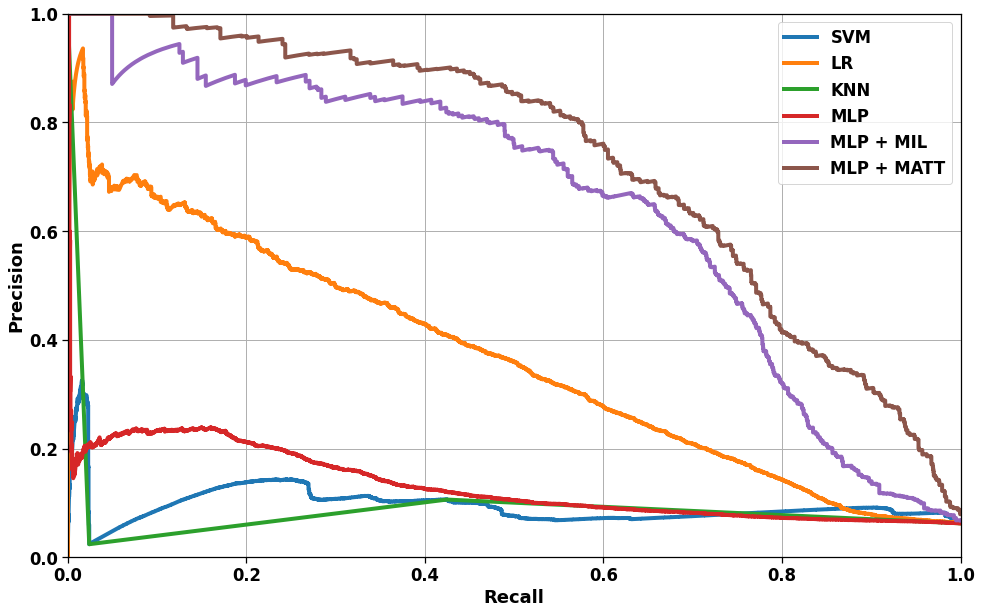

In [293]:
from matplotlib.font_manager import FontProperties


output_path = ROOT_PATH + "/outputs/logits/best_results"

plt.figure(figsize = (16, 10))
# plt.style.use()
# plt.style.use('seaborn')

precision,recall,threshold = precision_recall_curve(exclude_na_flatten_label, svm_results_prob.reshape(-1))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="SVM")
plt.plot(recall[:], precision[:], lw=4, label="SVM")
pd.DataFrame([precision, recall]).to_csv("svm-fma_all.txt", index=False)
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/SVM-fma_all.csv", index = False)


precision,recall,threshold = precision_recall_curve(exclude_na_flatten_label, lr_results_prob.reshape(-1))
# plt.plot(recall[:], precision[:],"-k", marker=",", markevery=60, lw=2, label="LR")
plt.plot(recall[:], precision[:], lw=4, label="LR")
pd.DataFrame([precision, recall]).to_csv("lr-fma_all.txt", index=False)
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/LR-fma_all.csv", index = False)


precision,recall,threshold = precision_recall_curve(exclude_na_flatten_label, knn_results_prob.reshape(-1))
# plt.plot(recall[:], precision[:],"-y", marker="*", markevery=60, lw=2, label="KNN")
plt.plot(recall[:], precision[:], lw=4, label="KNN")
pd.DataFrame([precision, recall]).to_csv("knn-fma_all.txt", index=False)
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/KNN-fma_all.csv", index = False)


precision,recall,threshold = precision_recall_curve(exclude_na_flatten_label, mlp_results_prob.reshape(-1))
# plt.plot(recall[:], precision[:],"-g", marker="1", markevery=60, lw=2, label="MLP")
# plt.plot(recall[:], precision[:], label="MLP")
plt.plot(recall[:], precision[:], lw=4, label="MLP")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/MLP-fma_all.csv", index = False)


## Bag-MLP

testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "fma_all", device=device)

score = output_path + "/MLP1LayerBag-Blank-fma_all--auc-0.5850106605362679-accuracy-0.6921881437301636-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
print("MLP-MIL Bag-Level Average Precision: ", average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))
y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))
y_predict_label_flatten = np.array(y_predict_label_flatten)
y_mel_label_ = np.zeros((len(testDataLoader.label), 16))
y_mel_label_[np.arange(len(testDataLoader.label)), testDataLoader.label] = 1
y_mel_label_
# precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
precision,recall,threshold = precision_recall_curve(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1))
print("MLP-MIL Segment-Level Average Precision: ", average_precision_score(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1)))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MIL")
plt.plot(recall[:], precision[:], lw=4, label="MLP + MIL")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/MLP+MIL-fma_all.csv", index = False)


## MLP-MATT

score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
print("MLP-MATT Bag-Level Average Precision: ", average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))
y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))
y_predict_label_flatten = np.array(y_predict_label_flatten)
y_mel_label_ = np.zeros((len(testDataLoader.label), 16))
y_mel_label_[np.arange(len(testDataLoader.label)), testDataLoader.label] = 1
y_mel_label_
# precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
precision,recall,threshold = precision_recall_curve(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1))
print("MLP-MATT Segment-Level Average Precision: ", average_precision_score(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1)))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:], lw=4, label="MLP + MATT")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/MLP+MATT-fma_all.csv", index = False)

plt.xlabel('Recall', weight="bold")
plt.ylabel('Precision', weight="bold")
plt.ylim([0, 1])
plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall Area={0:1.4f}'.format(auc))
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], weight = 'bold')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], weight = 'bold')

legend_properties = {'weight':'bold'}

plt.legend(prop=legend_properties)

plt.savefig("pr1.png")
plt.show()

In [275]:
y_predict_label_flatten.shape

(2573, 16)

In [271]:
y_mel_label_.shape

(2573, 16)

In [ ]:
testDataLoader.label.shape

## Pr-2

CRNN-MATT Bag-Level Average Precision:  0.6511054557402031
CRNN-MIL Segment-Level Average Precision:  0.695881777320194
CRNN-TF-MIL Bag-Level Average Precision:  0.5153466107627882
CRNN-TF-MIL Segment-Level Average Precision:  0.6106842811668627
CRNN-MATT Bag-Level Average Precision:  0.681650779797164
CRNN-MATT Segment-Level Average Precision:  0.7356715689631064
CRNN-TF-MATT Bag-Level Average Precision:  0.7120520788445732
CRNN-TF-MATT Segment-Level Average Precision:  0.726802785642557


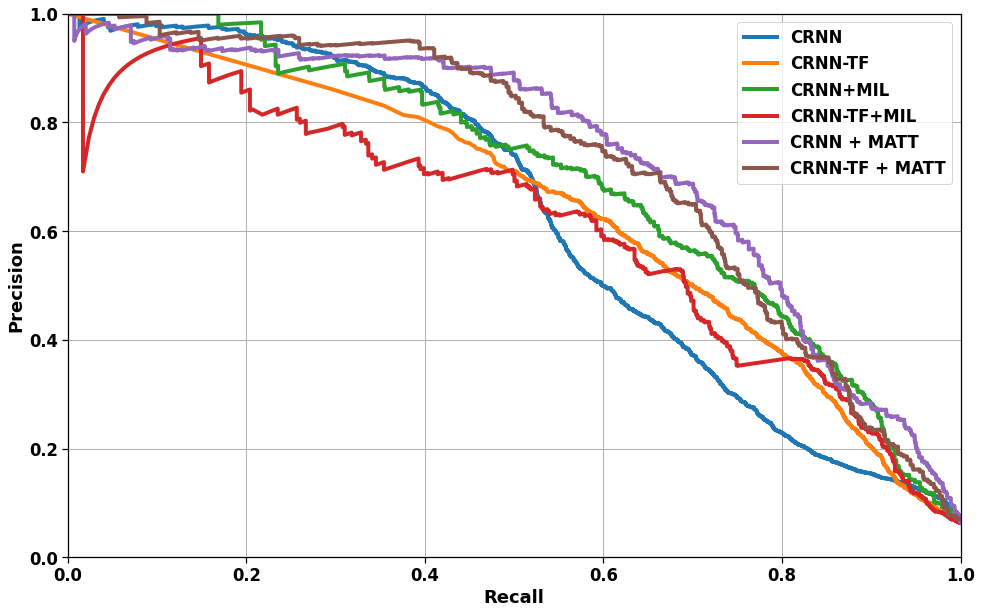

In [292]:
output_path = ROOT_PATH + "/outputs/logits/best_results"

plt.figure(figsize = (16, 10))
# plt.style.use()
# plt.style.use('seaborn')

testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "mel_1360_96", device=device)

# CRNN and CGRNN
all_true_label =  np.zeros((len(testDataLoader.label_top), 16))
for pid in range(len(testDataLoader.label_top)):
    all_true_label[pid][testDataLoader.label_top[pid]] = 1
testDataLoader.exclude_na_flatten_label = np.reshape(all_true_label, -1)

score = output_path + "/CRNNBaseline16-mel_1360_96--auc-0.6243799852515145-accuracy-0.6323268413543701-params-tb_14-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:], lw=4, label="CRNN")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/PR-CRNN_mel_1360_6.csv", index = False)

score = output_path + "/CGRNNBaseline16-mel_1360_96--auc-0.6243979863337593-accuracy-0.6475671529769897-params-tb_14-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:], lw=4, label="CRNN-TF")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/PR-CRNN-TF_mel_1360_96.csv", index = False)

# CRNN and CGRNN + MIL

testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = 'mel_1360_96', device=device)
y_mel_label_ = np.zeros((len(testDataLoader.label), 16))
y_mel_label_[np.arange(len(testDataLoader.label)), testDataLoader.label] = 1
y_mel_label_

score = output_path + "/MNMLP1LayerBag-crnn-mel_1360_96--auc-0.6511054557402031-accuracy-0.7192845940589905-params-tb_14-lr_0.1-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
print("CRNN-MATT Bag-Level Average Precision: ", average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))
y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))
y_predict_label_flatten = np.array(y_predict_label_flatten)

# precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
precision,recall,threshold = precision_recall_curve(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1))
print("CRNN-MIL Segment-Level Average Precision: ", average_precision_score(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1)))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:], lw=4, label="CRNN+MIL")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/PR-CRNN+MIL_mel_1360_96.csv", index = False)

score = output_path + "/MNMLP1LayerBag-cgrnn-mel_1360_96--auc-0.5153466107627882-accuracy-0.7188957929611206-params-tb_14-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
print("CRNN-TF-MIL Bag-Level Average Precision: ", average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))
y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))
y_predict_label_flatten = np.array(y_predict_label_flatten)
# precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
precision,recall,threshold = precision_recall_curve(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1))
print("CRNN-TF-MIL Segment-Level Average Precision: ", average_precision_score(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1)))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:], lw=4, label="CRNN-TF+MIL")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/PR-CRNN-TF+MIL_mel_1360_96.csv", index = False)


# CRNN and CGRNN + MATT

# testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = 'mel_1360_96', device=device)
score = output_path + "/AttentionNetwork16-crnn-mel_1360_96--auc-0.681650779797164-accuracy-0.690902054309845-params-tb_12-lr_0.3-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
print("CRNN-MATT Bag-Level Average Precision: ", average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))
y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))
y_predict_label_flatten = np.array(y_predict_label_flatten)
# precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
precision,recall,threshold = precision_recall_curve(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1))
print("CRNN-MATT Segment-Level Average Precision: ", average_precision_score(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1)))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:],lw=4,  label="CRNN + MATT")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/PR-CRNN+MATT_mel_1360_96.csv", index = False)

score = output_path + "/AttentionNetwork16-cgrnn-mel_1360_96--auc-0.7120520788445732-accuracy-0.6905132532119751-params-tb_12-lr_0.1-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
print("CRNN-TF-MATT Bag-Level Average Precision: ", average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))
y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))
y_predict_label_flatten = np.array(y_predict_label_flatten)
# precision,recall,threshold = precision_recall_curve(testDataLoader.exclude_na_flatten_label,y_scores)
precision,recall,threshold = precision_recall_curve(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1))
print("CRNN-TF-MATT Segment-Level Average Precision: ", average_precision_score(y_mel_label_.reshape(-1),y_predict_label_flatten.reshape(-1)))
# plt.plot(recall[:], precision[:], "-c", marker="2", markevery=60, lw=2, label="MLP + MATT")
plt.plot(recall[:], precision[:],lw=4,  label="CRNN-TF + MATT")
pd.DataFrame({'precision': precision, 'recall': recall}).to_csv(PLOT_DATA_PATH + "/PR-CRNN-TF+MATT_mel_1360_96.csv", index = False)


plt.xlabel('Recall', weight="bold")
plt.ylabel('Precision', weight="bold")
plt.ylim([0, 1])
plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall Area={0:1.4f}'.format(auc))
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], weight = 'bold')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], weight = 'bold')

legend_properties = {'weight':'bold'}

plt.legend(prop=legend_properties)

plt.grid(True)
plt.savefig("pr2.png")
plt.show()

In [130]:
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "fma_all", device=device)

index = []
scope = [0]
label = []
for i in range(len(testDataLoader.instance_scope)):
        index = index + list(range(testDataLoader.instance_scope[i][0], testDataLoader.instance_scope[i][1] + 1))
        label.append(testDataLoader.label[testDataLoader.instance_scope[i][0]])
        scope.append(scope[len(scope) - 1] + testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
label_ = np.zeros((len(testDataLoader.instance_scope), 16))
label_[np.arange(len(testDataLoader.instance_scope)), label] = 1
label_ = torch.argmax(torch.LongTensor(label_), axis = 1)

score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
predictions = torch.tensor(np.argmax(y_scores.reshape(-1, 16), axis = -1))
correct_predictions = torch.eq(label_, torch.tensor(predictions).float())
torch.mean(correct_predictions.float())
sk_accuracy_sum = 0.0
sk_total_num = 0.0
for i in range(len(correct_predictions)):
    sk_accuracy_sum += torch.eq(predictions[i],
                                label_[i]) * (
                                   testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
    sk_total_num += (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
sk_accuracy_sum/sk_total_num

C:\Users\Johan\AppData\Local\Temp\ipykernel_29488\593184565.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  correct_predictions = torch.eq(label_, torch.tensor(predictions).float())


tensor(0.6883)

# Calculate TopK Accuracy Manully

## MLP+MATT

In [131]:
score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"

In [132]:
idx_fewid100_list = []
for i in range(len(testDataLoader.label)): # 2573
    if testDataLoader.label[i] in few_relid100:
        idx_fewid100_list.append(i)

idx_fewid200_list = []
for i in range(len(testDataLoader.label)):
    if testDataLoader.label[i] in few_relid200:
        idx_fewid200_list.append(i)
print(len(idx_fewid100_list) , len(idx_fewid200_list))


170 188


In [133]:
# y_label_flatten = []
# score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7123190763259505-accuracy-0.6906335353851318-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)

y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend([y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1) )

y_predict_label_flatten = np.array(y_predict_label_flatten)
len(y_predict_label_flatten)

2573

In [134]:
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list], k=2, labels= labels)
top2score

0.2823529411764706

In [90]:
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list], k=3, labels= labels)
top2score

0.4470588235294118

In [91]:
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list], k=5, labels= labels)
top2score

0.47058823529411764

In [92]:
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list], k=2, labels= labels)
top2score

0.26595744680851063

In [93]:
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list], k=3, labels= labels)
top2score

0.4148936170212766

In [94]:
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list], k=5, labels= labels)
top2score

0.44148936170212766

In [135]:
average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores)

0.7123190763259505

## CRNN

In [258]:
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "mel_1360_96", device=device)

score = output_path + "/CRNNBaseline16-mel_1360_96--auc-0.6243799852515145-accuracy-0.6323268413543701-params-tb_14-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)

idx_fewid100_list = []
for i in range(len(testDataLoader.label)):  # 2573
    if testDataLoader.label[i] in few_relid100:
        idx_fewid100_list.append(i)

idx_fewid200_list = []
for i in range(len(testDataLoader.label)):
    if testDataLoader.label[i] in few_relid200:
        idx_fewid200_list.append(i)
print(len(idx_fewid100_list), len(idx_fewid200_list))

# y_label_flatten = []
# score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"


y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))

y_predict_label_flatten = np.array(y_predict_label_flatten)
len(y_predict_label_flatten)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=5, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=5, labels=labels)
print(top2score)
# print(average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))

170 188
0.09411764705882353
0.13529411764705881
0.34705882352941175
0.0851063829787234
0.12234042553191489
0.3882978723404255


## CRNN-TF

In [156]:
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "mel_1360_96", device=device)

score = output_path + "/CGRNNBaseline16-mel_1360_96--auc-0.6243979863337593-accuracy-0.6475671529769897-params-tb_14-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)

idx_fewid100_list = []
for i in range(len(testDataLoader.label)):  # 2573
    if testDataLoader.label[i] in few_relid100:
        idx_fewid100_list.append(i)

idx_fewid200_list = []
for i in range(len(testDataLoader.label)):
    if testDataLoader.label[i] in few_relid200:
        idx_fewid200_list.append(i)
print(len(idx_fewid100_list), len(idx_fewid200_list))

# y_label_flatten = []
# score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"


y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))

y_predict_label_flatten = np.array(y_predict_label_flatten)
len(y_predict_label_flatten)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=5, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=5, labels=labels)
print(top2score)
# print(average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))

170 188
0.023529411764705882
0.09411764705882353
0.20588235294117646
0.02127659574468085
0.0851063829787234
0.18617021276595744


## CRNN+MATT

In [157]:
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "mel_1360_96", device=device)

score = output_path + "/AttentionNetwork16-crnn-mel_1360_96--auc-0.681650779797164-accuracy-0.690902054309845-params-tb_12-lr_0.3-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)

idx_fewid100_list = []
for i in range(len(testDataLoader.label)):  # 2573
    if testDataLoader.label[i] in few_relid100:
        idx_fewid100_list.append(i)

idx_fewid200_list = []
for i in range(len(testDataLoader.label)):
    if testDataLoader.label[i] in few_relid200:
        idx_fewid200_list.append(i)
print(len(idx_fewid100_list), len(idx_fewid200_list))

# y_label_flatten = []
# score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"


y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))

y_predict_label_flatten = np.array(y_predict_label_flatten)
len(y_predict_label_flatten)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=5, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=5, labels=labels)
print(top2score)
print(average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))

170 188
0.5411764705882353
0.5588235294117647
0.5764705882352941
0.4946808510638298
0.5159574468085106
0.6170212765957447
0.681650779797164


## CGRNN+MATT

In [158]:
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "mel_1360_96", device=device)

score = output_path + "/AttentionNetwork16-cgrnn-mel_1360_96--auc-0.7120520788445732-accuracy-0.6905132532119751-params-tb_12-lr_0.1-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)

idx_fewid100_list = []
for i in range(len(testDataLoader.label)):  # 2573
    if testDataLoader.label[i] in few_relid100:
        idx_fewid100_list.append(i)

idx_fewid200_list = []
for i in range(len(testDataLoader.label)):
    if testDataLoader.label[i] in few_relid200:
        idx_fewid200_list.append(i)
print(len(idx_fewid100_list), len(idx_fewid200_list))

# y_label_flatten = []
# score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"


y_predict_label_flatten = []
for i in range(len(testDataLoader.instance_scope)):
    y_predict_label_flatten.extend(
        [y_scores.reshape(-1, 16)[i]] * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1))

y_predict_label_flatten = np.array(y_predict_label_flatten)
len(y_predict_label_flatten)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid100_list], y_predict_label_flatten[idx_fewid100_list],
                                 k=5, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=2, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=3, labels=labels)
print(top2score)
top2score = top_k_accuracy_score(testDataLoader.label[idx_fewid200_list], y_predict_label_flatten[idx_fewid200_list],
                                 k=5, labels=labels)
print(top2score)
print(average_precision_score(testDataLoader.exclude_na_flatten_label, y_scores))

170 188
0.5411764705882353
0.6352941176470588
0.6529411764705882
0.4946808510638298
0.5904255319148937
0.6117021276595744
0.7120520788445732


# Calculate Accuracy Manully

In [176]:
testDataLoader = LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = "fma_all", device=device)

index = []
scope = [0]
label = []
for i in range(len(testDataLoader.instance_scope)):
        index = index + list(range(testDataLoader.instance_scope[i][0], testDataLoader.instance_scope[i][1] + 1))
        label.append(testDataLoader.label[testDataLoader.instance_scope[i][0]])
        scope.append(scope[len(scope) - 1] + testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
label_ = np.zeros((len(testDataLoader.instance_scope), 16))
label_[np.arange(len(testDataLoader.instance_scope)), label] = 1
label_ = torch.argmax(torch.LongTensor(label_), axis = 1)

In [168]:
score = output_path + "/AttentionNetwork16-Blank-fma_all--auc-0.7202442584294232-accuracy-0.6883016228675842-params-tb_160-lr_0.2-weight_decay_1e-05-keep_prob_0.5.npy"
all_true_label =  np.zeros((len(testDataLoader.label_top), 16))
for pid in range(len(testDataLoader.label_top)):
    all_true_label[pid][testDataLoader.label_top[pid]] = 1
testDataLoader.exclude_na_flatten_label = np.reshape(all_true_label, -1)

y_scores = np.load(score)
predictions = torch.tensor(np.argmax(y_scores.reshape(-1, 16), axis = -1))
correct_predictions = torch.eq(label_, torch.tensor(predictions).float())
torch.mean(correct_predictions.float())
sk_accuracy_sum = 0.0
sk_total_num = 0.0
for i in range(len(correct_predictions)):
    sk_accuracy_sum += torch.eq(predictions[i],
                                label_[i]) * (
                                   testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
    sk_total_num += (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
sk_accuracy_sum/sk_total_num

C:\Users\Johan\AppData\Local\Temp\ipykernel_30548\1101841486.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  correct_predictions = torch.eq(label_, torch.tensor(predictions).float())


tensor(0.6883)

In [175]:
# all_true_label =  np.zeros((len(testDataLoader.label_top), 16))
# for pid in range(len(testDataLoader.label_top)):
#     all_true_label[pid][testDataLoader.label_top[pid]] = 1
# testDataLoader.exclude_na_flatten_label = np.reshape(all_true_label, -1)
testDataLoader =  LoadFMA.FMATestDataLoader(mode="pr", use_label = 'top' , feature_mode = 'mel_1360_96', device=device)

index = []
scope = [0]
label = []
for i in range(len(testDataLoader.instance_scope)):
        index = index + list(range(testDataLoader.instance_scope[i][0], testDataLoader.instance_scope[i][1] + 1))
        label.append(testDataLoader.label[testDataLoader.instance_scope[i][0]])
        scope.append(scope[len(scope) - 1] + testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
label_ = np.zeros((len(testDataLoader.instance_scope), 16))
label_[np.arange(len(testDataLoader.instance_scope)), label] = 1
label_ = torch.argmax(torch.LongTensor(label_), axis = 1)

score = output_path + "/MNMLP1LayerBag-cgrnn-mel_1360_96--auc-0.5381815039629877-accuracy-0.7157853841781616-params-tb_14-lr_0.1-weight_decay_1e-05-keep_prob_0.5.npy"
y_scores = np.load(score)
predictions = torch.tensor(np.argmax(y_scores.reshape(-1, 16), axis = -1))
correct_predictions = torch.eq(label_, torch.tensor(predictions).float())
torch.mean(correct_predictions.float())
sk_accuracy_sum = 0.0
sk_total_num = 0.0
for i in range(len(correct_predictions)):
    sk_accuracy_sum += torch.eq(predictions[i],
                                label_[i]) * (
                                   testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
    sk_total_num += (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
sk_accuracy_sum/sk_total_num

C:\Users\Johan\AppData\Local\Temp\ipykernel_30548\4047025046.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  correct_predictions = torch.eq(label_, torch.tensor(predictions).float())


tensor(0.7158)

In [85]:
sk_accuracy_sum = 0.0
sk_total_num = 0.0
for i in range(len(testDataLoader.instance_scope)):
    if testDataLoader.instance_scope[i][0] == testDataLoader.instance_scope[i][1]:
        sk_accuracy_sum += torch.eq(predictions[i],
                                label_[i]) * (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
        sk_total_num += (testDataLoader.instance_scope[i][1] - testDataLoader.instance_scope[i][0] + 1)
sk_accuracy_sum/sk_total_num

tensor(0.6369)

In [86]:
evalMetric = metric.EvaFMATMetric(testDataLoader.id2genre,
                                               testDataLoader.fewrel_100,
                                               testDataLoader.fewrel_200,
                                               exclude_na_flatten_label,
                                               exclude_na_label,
                                               index_non_zero
                                               )

In [87]:
evalMetric.mi_ma_100_sklearn(y_scores.reshape(-1, 16), testDataLoader.instance_scope)

{'mi_10': 0.0,
 'mi_15': 0.0,
 'mi_20': 0.029535864978902954,
 'ma_10': 0.0,
 'ma_15': 0.0,
 'ma_20': 0.05798079807980798}

# evalMetric.mi_ma_100_stdsk(mlp_results_prob, y_test)

In [ ]:
import PyGnuplot as gp
gp.default_term = 'wxt'


In [ ]:
X = np.arange(10)
Y = np.sin(X/(2*np.pi))
Z = Y**2.0
gp.s([X,Y,Z])
gp.c('plot "tmp.dat" u 1:2 w lp')
gp.c('replot "tmp.dat" u 1:3 w lp')
gp.p('myfigure.ps')

In [123]:
medium_label = np.load(DATA_PATH + '/' + 'medium_label.npy')
medium_scope = np.load(DATA_PATH + '/' + 'medium_instance_scope.npy')
unique_size = 0.0
for i, j in medium_scope:
    o = medium_label[i]
    for k in range(i, j+1):
        if medium_label[k] != o:
            unique_size += 1
unique_size/len(medium_label)

0.0

In [124]:
medium_scope[-1]

array([24999, 24999])

In [121]:
medium_label = np.load(DATA_PATH + '/' + 'large_label.npy')
medium_scope = np.load(DATA_PATH + '/' + 'large_instance_scope.npy')
unique_size = 0.0
for i, j in medium_scope:
    o = medium_label[i]
    for k in range(i, j+1):
        if medium_label[k] != o:
            unique_size += 1
unique_size/len(medium_label)

0.0

In [122]:
medium_scope[-1]

array([106573, 106573])

In [116]:
medium_label = np.load(DATA_PATH + '/' + 'large_test_label.npy')
medium_scope = np.load(DATA_PATH + '/' + 'large_test_entity_scope.npy')
unique_size = 0.0
for i, j in medium_scope:
    o = medium_label[i]
    for k in range(i, j+1):
        if medium_label[k] != o:
            unique_size += 1
unique_size/len(medium_label)

0.00985527834502353